In [ ]:
!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

     |████████████████████████████████| 1.4MB 4.5MB/s 
     |████████████████████████████████| 4.7MB 17.8MB/s 
     |████████████████████████████████| 317kB 47.2MB/s 
     |████████████████████████████████| 911kB 4.2MB/s 
     |████████████████████████████████| 2.8MB 4.6MB/s 


In [ ]:
import numpy as np
# import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import theano.tensor as tt
# import scipy.stats as stats
import arviz as az
import logging
from google.colab import files
logger = logging.getLogger("pymc3")
logger.propagate = False

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


Reading the data files for wTCR, wCD45 and dep:

In [ ]:
g11_data_array0 = np.array([[17.661,19.183,19.73,19.805,19.458,19.891,19.527,19.54,19.832,20.157,20.128],
[19.807,20.516,20.608,21.018,20.983,20.983,20.846,20.773,20.84,20.802,20.817],
[14.854,16.5,16.518,16.88,15.239,17.3,18.122,18.695,18.583,18.248,18.701],
[17.808,20.029,19.971,19.622,19.793,19.91,19.881,19.915,19.98,20.045,19.794],
[17.145,16.825,17.533,18.228,19.001,18.377,17.976,18.51,18.094,18.188,18.366],
[19.667,20.514,20.274,20.947,20.916,21.256,21.668,21.175,20.76,20.632,20.101],
[18.68,18.576,18.716,19.04,19.282,19.41,19.602,19.408,19.639,19.461,19.855],
[16.496,18.266,18.58,18.612,18.559,19.555,19.953,20.253,20.713,20.557,20.536],
[17.674,18.396,18.03,18.118,17.606,17.807,18.07,17.928,17.594,17.25,17.308],
[19.08,19.262,18.823,18.762,17.688,16.945,17.339,18.742,18.945,19.308,19.242],
[15.556,17.646,16.964,16.932,17.065,16.846,17.816,16.883,17.014,17.24,17.83],
[18.485,19.306,19.624,19.605,19.746,19.579,20.574,20.42,20.268,20.555,20.235],
[15.822,18.493,18.293,18.172,17.955,17.996,18.483,19.479,19.548,19.265,19.335],
[18.794,19.639,19.373,19.302,18.612,19.361,19.757,19.137,19.559,17.867,18.11],
[19.544,19.512,19.452,19.359,19.638,19.804,19.639,19.734,19.606,19.516,19.298],
[18.865,18.723,18.375,17.985,19.549,19.418,19.875,18.889,18.312,18.905,19.247],
[17.74,19.186,19.218,19.565,19.492,19.574,19.547,19.58,19.534,19.937,20.119],
[18.161,18.791,18.908,19.036,19.124,19.352,19.251,19.114,18.099,17.437,17.8],
[17.938,19.659,19.598,19.619,19.361,19.318,18.931,18.962,18.84,18.572,18.795],
[19.298,20.702,20.232,18.734,18.933,18.68,20.009,20.906,19.983,21.698,21.396]])

g22_data_array0 = np.array([[40.041,52.171,51.35,29.385,29.899,26.539,24.747,25.122,25.862,24.263,23.395],
[40.704,65.18,16.491,21.928,17.19,19.452,19.197,17.847,19.484,21.011,21.138],
[39.042,42.095,16.474,16.675,14.722,13.55,17.955,18.605,18.349,18.939,19.479],
[38.419,47.203,14.739,12.982,12.733,15.255,13.751,16.323,17.894,17.449,19.414],
[39.108,53.466,12.586,12,12.753,14.967,15.872,15.312,17.068,16.613,14.618],
[38.113,45.535,20.098,12.111,11.407,13.368,13.442,13.216,13.973,17.431,15.352],
[39.648,50.23,19.223,12.787,13.078,15.23,13.828,13.692,12.99,12.969,13.974],
[38.017,50.687,17.7,12.634,15.672,13.763,14.569,13.574,15.226,13.608,14.524],
[36.345,69.927,19.105,11.132,11.422,11.372,12.303,11.948,12.753,14.639,14.842],
[40.794,61.187,28.937,13.248,13.526,12.374,12.695,13.368,13.863,11.607,14.586],
[40.921,55.434,15.722,12.631,11.345,11.369,12.609,12.635,12.586,13.711,12.415],
[38.929,56.889,18.765,11.926,11.054,12.053,11.273,11.119,12.761,13.477,13.677],
[39.473,50.729,21.278,12.516,12.972,12.526,12.54,11.717,11.926,13.661,12.903],
[38.131,35.466,11.213,9.67,11.095,10.651,10.628,10.119,12.048,11.376,12.653],
[39.627,53.418,21.563,9.6493,11.463,10.294,10.446,11.087,11.837,11.89,12.081],
[38.691,56.514,13.84,10.841,10.191,10.97,10.824,11.493,11.993,10.927,12.072],
[38.369,63.582,19.472,12.247,12.861,10.001,11.511,11.678,10.888,11.904,10.845],
[38.179,68.412,17.91,11.824,12.56,13.241,10.941,10.486,10.073,10.858,10.58],
[37.695,58.418,21.777,21.935,11.346,10.919,11.021,12.221,11.51,10.89,11.082],
[39.867,56.521,29.038,14.488,12.373,10.574,11.135,10.364,9.2701,10.909,10.99]])

g12_data_array0 = np.array([[21.443,2.146,1.8681,3.8138,3.9293,5.6677,5.3346,4.3738,4.2115,5.28,8.2552],
[24.357,5.1339,6.7392,8.223,9.3518,10.359,11.295,10.972,12.868,13.388,13.722],
[20.173,5.2959,7.333,7.8585,10.086,11.09,11.441,12.287,12.422,13.599,14.602],
[21.048,6.5607,8.4275,10.31,11.318,12.677,13.688,14.361,14.064,14.734,15.726],
[25.645,5.9201,9.4306,10.969,12.123,12.807,13.398,14.336,14.965,15.327,16.625],
[21.139,7.0034,9.7752,10.405,11.668,12.448,13.244,15.181,15.767,16.214,18.283],
[21.274,6.9867,9.6211,11.519,13.453,14.475,15.672,17.101,17.715,18.632,19.162],
[23.961,8.0956,10.543,11.696,13.353,14.386,15.99,17.091,18.055,18.893,19.542],
[22.423,8.268,10.87,11.669,13.451,15.054,16.721,17.912,18.917,19.362,19.769],
[27.017,7.3613,10.131,12.155,13.812,15.167,16.219,16.971,18.294,18.95,19.332],
[20.636,8.0815,10.922,12.998,14.427,15.393,16.38,17.264,17.915,19.277,20.381],
[19.696,9.7434,12.274,13.932,15.715,17.327,18.2,19.712,20.157,21.347,22.44],
[22.62,8.7923,11.49,12.903,14.329,15.736,16.811,17.696,18.532,19.141,20.687],
[21.159,8.8581,10.963,13.294,14.779,16.134,17.312,18.822,19.915,21.127,22.049],
[23.141,7.6794,10.896,12.606,14.96,16.412,17.242,17.534,19.21,20.28,20.491],
[24.11,7.9982,10.606,11.875,13.188,14.998,16.305,17.323,18.873,20.375,20.659],
[25.384,7.243,10.881,13.414,15.346,16.97,18.282,18.986,20.141,21.525,22.371],
[21.893,8.3062,11.252,12.743,14.472,16.041,17.768,19.057,20.07,20.825,21.393],
[23.24,7.2108,10.11,12.491,14.012,16.15,17.421,18.109,19.321,20.581,22.27],
[23.722,9.4973,11.47,13.331,15.163,17.049,17.551,18.817,20.326,20.695,22.219]])


Converting data to nanometers and cropping the data:

In [ ]:
# scaling data to nanometer and cropping data:
# 2 is for half width to full width. 10 is for pixel to nm:
wTCR_array0 = 2*10*g11_data_array0 
wCD45_array0 = 2*10*g22_data_array0
dep_array0 = 10*g12_data_array0

size_k, size_t = np.shape(dep_array0)

t0 = np.linspace(0, 100, size_t)
k0 = np.linspace(5, 100, size_k)


# select indices for t and k:
t_start = 1
k_start = 1

selekted_t_inds = np.arange(t_start,size_t,1)
selekted_k_inds = np.arange(k_start,size_k,2)

wTCR_array1 = wTCR_array0[selekted_k_inds,:]
wTCR_array = wTCR_array1[:,selekted_t_inds]

wCD45_array1 = wCD45_array0[selekted_k_inds,:]
wCD45_array = wCD45_array1[:,selekted_t_inds]

dep_array1 = dep_array0[selekted_k_inds,:]
dep_array = dep_array1[:,selekted_t_inds]

t = t0[selekted_t_inds]
k = k0[selekted_k_inds]

[t_array, k_array] = np.meshgrid(t,k)

# print(t)
# print(k)

if False:
    np.save("wTCR_evidence_nm.npy", wTCR_array)
    np.save("wCD45_evidence_nm.npy", wCD45_array)
    np.save("dep_evidence_nm.npy", dep_array)

    from google.colab import files
    files.download("wTCR_evidence_nm.npy") # Download locally from colab
    files.download("wCD45_evidence_nm.npy")
    files.download("dep_evidence_nm.npy") 


Plotting the input data:

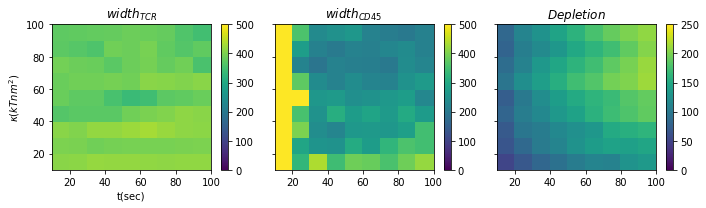

In [ ]:
fig, ax1=plt.subplots(1,3, figsize=[10,3],sharey=True)

vmin0 = 0
vmax0 = 500
im0 = ax1[0].pcolor(t ,k, wTCR_array, vmin=vmin0, vmax=vmax0)
# ax1[0].contour(t ,k, wTCR_array, vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax1[0])
ax1[0].set_title("$width_{TCR}$")
ax1[0].set_xlabel("t(sec)")
ax1[0].set_ylabel("$\kappa(kTnm^2)$")

vmin1 = 0
vmax1 = 500
im1 = ax1[1].pcolor(t ,k, wCD45_array, vmin=vmin1, vmax=vmax1)
# ax1[1].contour(t ,k, wCD45_array, vmin=vmin1, vmax=vmax1, colors='w')
fig.colorbar(im1, ax=ax1[1])
ax1[1].set_title('$width_{CD45}$')

vmin2 = 0
vmax2 = 250
im2 = ax1[2].pcolor(t ,k, dep_array, vmin=vmin2, vmax=vmax2)
# ax1[2].contour(t ,k, dep_array, vmin=vmin2, vmax=vmax2, colors='w')
fig.colorbar(im2, ax=ax1[2])
ax1[2].set_title('$Depletion$')

plt.tight_layout()

Untrained values of random variables (rv):

In [ ]:
use_wTCR = False
use_wCD45 = False
use_sigmoid = False
### wTCR:
# slope_t, HalfNormal:
sd_rv_slope_t_wTCR_KS1 = 1

# slope_k, HalfNormal:
sd_rv_slope_k_wTCR_KS1 = 1

# intercept, Normal:
mu_rv_intercept_wTCR_KS1 = 500
sd_rv_intercept_wTCR_KS1 = 100

# noise, HalfNormal:
sd_rv_noise_wTCR_KS1 = 50

### wCD45:
# slope_t, HalfNormal:
sd_rv_slope_t_wCD45_KS1 = 1

# slope_k, HalfNormal:
sd_rv_slope_k_wCD45_KS1 = 1

# intercept, Normal:
mu_rv_intercept_wCD45_KS1 = 500
sd_rv_intercept_wCD45_KS1 = 100

# noise, HalfNormal:
sd_rv_noise_wCD45_KS1 = 50

if use_sigmoid:
    ### dep:
    # center_t, Normal:
    mu_rv_center_t_dep_KS1 = 30
    sd_rv_center_t_dep_KS1 = 10

    # devisor_t, TruncatedNormal:
    mu_rv_divisor_t_dep_KS1 = 30
    sd_rv_divisor_t_dep_KS1 = 10
    lower_rv_divisor_t_dep_KS1 = 0
    upper_rv_divisor_t_dep_KS1 = None

    # center_k, Normal:
    mu_rv_center_k_dep_KS1 = 0
    sd_rv_center_k_dep_KS1 = 20

    # devisor_k, TruncatedNormal:
    mu_rv_divisor_k_dep_KS1 = 25
    sd_rv_divisor_k_dep_KS1 = 10
    lower_rv_divisor_k_dep_KS1 = 0
    upper_rv_divisor_k_dep_KS1 = None

    # min, TruncatedNormal:
    mu_rv_min_dep_KS1 = -80
    sd_rv_min_dep_KS1 = 20
    lower_rv_min_dep_KS1 = None
    upper_rv_min_dep_KS1 = 0

    # max, TruncatedNormal:
    mu_rv_max_dep_KS1 = 100
    sd_rv_max_dep_KS1 = 20
    lower_rv_max_dep_KS1 = 20
    upper_rv_max_dep_KS1 = None

    # sigRatio, Normal:
    mu_rv_sigRatio_dep_KS1 = 0
    sd_rv_sigRatio_dep_KS1 = 1

    # noise, HalfNormal:
    sd_rv_noise_dep_KS1 = 50
else:
    ### dep:
    # slope_t, HalfNormal:
    sd_rv_slope_t_dep_KS1 = 1

    # slope_k, HalfNormal:
    sd_rv_slope_k_dep_KS1 = 1

    # intercept, Normal:
    mu_rv_intercept_dep_KS1 = 500
    sd_rv_intercept_dep_KS1 = 100

    # noise, HalfNormal:
    sd_rv_noise_dep_KS1 = 50


Test:

In [ ]:
# mu_rv_center_t_dep_KS1 = 30
# sd_rv_center_t_dep_KS1 = 10
# center_t_dep_distribution = \
# pm.Normal.dist(mu=mu_rv_center_t_dep_KS1, 
#                sd=sd_rv_center_t_dep_KS1)
# center_t_dep_distribution.dist()

Untrained model1:

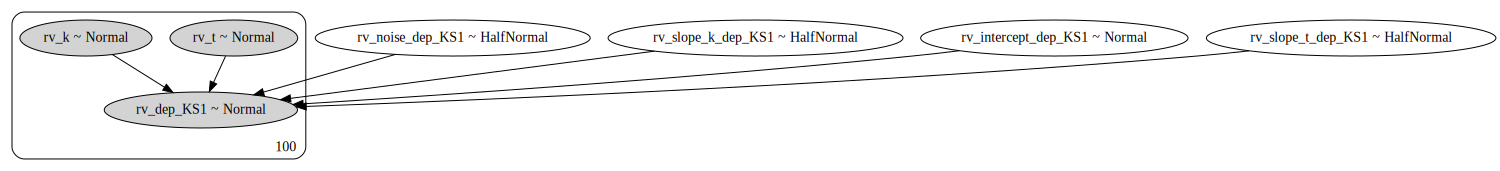

In [ ]:
def get_model1_untrained(t_array, k_array, 
    wTCR_array, wCD45_array, dep_array): #dm_CD45_KS_obs
    '''
    TODO: add proper documentation

    '''
    model1 = pm.Model()
    with model1:
        ### model1 - KS (kinetic segregation) ###########################    
        
        t_input = t_array.reshape(-1)
        k_input = k_array.reshape(-1)
        # rv_t = pm.Uniform('rv_t', 0, 100, observed=t_input)
        # rv_k = pm.Uniform('rv_k', 0, 100, observed=k_input)
        rv_t = pm.Normal('rv_t', mu = 70, sd = 30, observed = t_input)
        rv_k = pm.Normal('rv_k', mu = 50, sd = 20, observed = k_input)

        wTCR_KS1_obs = wTCR_array.reshape(-1)
        wCD45_KS1_obs = wCD45_array.reshape(-1)
        dep_KS1_obs = dep_array.reshape(-1)

        # wTCR_KS ####################################################
        if use_wTCR:
            # rv_variableName_parameterName_heatmapName_modelNameModelIndex:
            # rv_***_t_wTCR_KS1
            rv_slope_t_wTCR_KS1 = pm.HalfNormal('rv_slope_t_wTCR_KS1', 
                                                sd = sd_rv_slope_t_wTCR_KS1) # surface t slope
            # rv_***_k_wTCR_KS1
            rv_slope_k_wTCR_KS1 = pm.HalfNormal('rv_slope_k_wTCR_KS1', 
                                                sd = sd_rv_slope_k_wCD45_KS1) # surface k slope
            
            rv_intercept_wTCR_KS1 = pm.Normal('rv_intercept_wTCR_KS1', 
                                            mu = mu_rv_intercept_wCD45_KS1,
                                            sd = sd_rv_intercept_wCD45_KS1) # surface intercept

            rv_noise_wTCR_KS1 = pm.HalfNormal('rv_noise_wTCR_KS1', 
                                            sd = sd_rv_noise_wCD45_KS1) # noise 
            
            rv_wTCR_KS1 = pm.Normal('rv_wTCR_KS1', mu = rv_intercept_wTCR_KS1 +\
                                    rv_slope_t_wTCR_KS1*rv_t +\
                                    rv_slope_k_wTCR_KS1*rv_k,
                                    sd = rv_noise_wTCR_KS1, 
                                    observed = wTCR_KS1_obs) #

            
        # wCD45_KS ####################################################
        if use_wCD45:
            # rv_***_t_wCD45_KS1
            rv_slope_t_wCD45_KS1 = pm.HalfNormal('rv_slope_t_wCD45_KS1', 
                                                sd = sd_rv_slope_t_wCD45_KS1) # surface t slope
            # rv_***_k_wCD45_KS1
            rv_slope_k_wCD45_KS1 = pm.HalfNormal('rv_slope_k_wCD45_KS1', 
                                                sd = sd_rv_slope_k_wCD45_KS1) # surface k slope
            # rv_***_wCD45_KS1
            rv_intercept_wCD45_KS1 = pm.Normal('rv_intercept_wCD45_KS1', 
                                            mu = mu_rv_intercept_wCD45_KS1, 
                                            sd = sd_rv_intercept_wCD45_KS1) # surface intercept

            rv_noise_wCD45_KS1 = pm.HalfNormal('rv_noise_wCD45_KS1', 
                                                sd = sd_rv_noise_wCD45_KS1) # noise 
            # rv_wCD45_KS1, equation:
            rv_wCD45_KS1 = pm.Normal('rv_wCD45_KS1', mu = rv_intercept_wCD45_KS1 +\
                                    rv_slope_t_wCD45_KS1*rv_t +\
                                    rv_slope_k_wCD45_KS1*rv_k,
                                    sd = rv_noise_wCD45_KS1,
                                    observed=wCD45_KS1_obs) #

            
        # dep_KS ####################################################
        if use_sigmoid:
            # rv_***_t_dep_KS1
            rv_center_t_dep_KS1 = pm.Normal('rv_center_t_dep_KS1',
                                            mu = mu_rv_center_t_dep_KS1, 
                                            sd = sd_rv_center_t_dep_KS1)
            
            rv_divisor_t_dep_KS1 = pm.TruncatedNormal('rv_divisor_t_dep_KS1',
                                                    mu = mu_rv_divisor_t_dep_KS1,
                                                    sd = sd_rv_divisor_t_dep_KS1,
                                                    lower = lower_rv_divisor_t_dep_KS1,
                                                    upper = upper_rv_divisor_t_dep_KS1)
            # rv_***_k_dep_KS1
            rv_center_k_dep_KS1 = pm.Normal('rv_center_k_dep_KS1',
                                            mu = mu_rv_center_k_dep_KS1, 
                                            sd = sd_rv_center_k_dep_KS1)
            
            rv_divisor_k_dep_KS1 = pm.TruncatedNormal('rv_divisor_k_dep_KS1',
                                                    mu = mu_rv_divisor_k_dep_KS1, 
                                                    sd = sd_rv_divisor_k_dep_KS1,
                                                    lower = lower_rv_divisor_k_dep_KS1,
                                                    upper = upper_rv_divisor_k_dep_KS1)
            # 
            rv_min_dep_KS1 = pm.TruncatedNormal('rv_min_dep_KS1',
                                                mu = mu_rv_min_dep_KS1,
                                                sd = sd_rv_min_dep_KS1,
                                                lower = lower_rv_min_dep_KS1,
                                                upper = upper_rv_min_dep_KS1)
            # 
            rv_max_dep_KS1 = pm.TruncatedNormal('rv_max_dep_KS1',
                                                mu = mu_rv_max_dep_KS1,
                                                sd = sd_rv_max_dep_KS1,
                                                lower = lower_rv_max_dep_KS1,
                                                upper = upper_rv_max_dep_KS1)
            # 
            rv_sigRatio_dep_KS1 = pm.Normal('rv_sigRatio_dep_KS1',
                                            mu = mu_rv_sigRatio_dep_KS1,
                                            sd = sd_rv_sigRatio_dep_KS1)
            
            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1', sd=50) # noise 
            ###
            rv_tmp_x2 = (rv_t - rv_center_t_dep_KS1) / rv_divisor_t_dep_KS1
            rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

            rv_tmp_x1 = (rv_k - rv_center_k_dep_KS1) / rv_divisor_k_dep_KS1
            rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
            ###
            # rv_dep_KS1, equation:
            rv_dep_KS1 = pm.Normal('rv_dep_KS1', mu = rv_min_dep_KS1 +\
                                    (rv_max_dep_KS1 - rv_min_dep_KS1)*\
                                    rv_tmp_sig1 + rv_sigRatio_dep_KS1*rv_tmp_sig2,
                                    sd = sd_rv_noise_dep_KS1, observed=dep_KS1_obs)
        #################################################################
        else:
            # rv_***_t_dep_KS1
            rv_slope_t_dep_KS1 = pm.HalfNormal('rv_slope_t_dep_KS1', 
                                                sd = sd_rv_slope_t_wCD45_KS1) # surface t slope
            # rv_***_k_dep_KS1
            rv_slope_k_dep_KS1 = pm.HalfNormal('rv_slope_k_dep_KS1', 
                                                sd = sd_rv_slope_k_dep_KS1) # surface k slope
            # rv_***_dep_KS1
            rv_intercept_dep_KS1 = pm.Normal('rv_intercept_dep_KS1', 
                                            mu = mu_rv_intercept_dep_KS1, 
                                            sd = sd_rv_intercept_dep_KS1) # surface intercept

            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1', 
                                                sd = sd_rv_noise_dep_KS1) # noise 
            # rv_wCD45_KS1, equation:
            rv_dep_KS1 = pm.Normal('rv_dep_KS1', mu = rv_intercept_dep_KS1 +\
                                    rv_slope_t_dep_KS1*rv_t +\
                                    rv_slope_k_dep_KS1*rv_k,
                                    sd = rv_noise_dep_KS1,
                                    observed = dep_KS1_obs) #

    return model1

model1= get_model1_untrained(t_array, k_array, 
    wTCR_array, wCD45_array, dep_array) #dm_CD45_KS_obs
gv1 = pm.model_to_graphviz(model1)
gv1   

In [ ]:
with model1:
    trace1 = pm.sample(2000, chains=4);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_noise_dep_KS1, rv_intercept_dep_KS1, rv_slope_k_dep_KS1, rv_slope_t_dep_KS1]
Sampling chain 3, 0 divergences: 100%|██████████| 2500/2500 [00:05<00:00, 460.60it/s]
The acceptance probability does not match the target. It is 0.8831697291987433, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8971949747339611, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9125290972379695, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9142049640857445, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

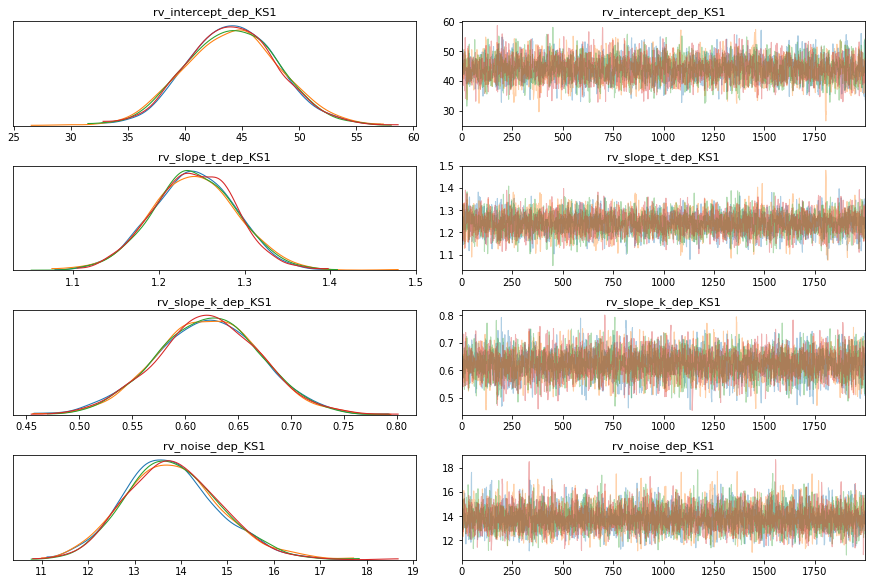

In [ ]:
pm.traceplot(trace1);

Once the 'trace' is given, its 'summary' can be saved and all following operations can be done on the saved 'trace_summary', (trace_summary = pm.summary(trace)).

In [ ]:
trace1_summary = pm.summary(trace1).round(3) # var_names=["mu", "tau"]
trace1_summary.to_pickle('trace1_summary')
from google.colab import files
if False: #True: # 
    files.download("trace1_summary") 
!ls

sample_data  trace1_summary


Read from saved (pickled) trace summary:

Getting 'mean' and 'sd' values from 'trace_summary':

In [ ]:
# r = read, to distinguish between the original and the saved files.
trace1_summary_r = pd.read_pickle('trace1_summary') 

# displaying the rv names and the data of intersest: 'mean' and 'sd':
mean_sd_r = trace1_summary_r.loc[:, ['mean','sd']]
mean_sd_r

mean     sd
rv_intercept_dep_KS1  44.114  4.001
rv_slope_t_dep_KS1     1.241  0.048
rv_slope_k_dep_KS1     0.621  0.049
rv_noise_dep_KS1      13.814  1.009

Validation:

In [ ]:
### wTCR:
if use_wTCR:
    wTCR_KS1_validation = trace1_summary_r.loc['rv_intercept_wTCR_KS1','mean'] +\
                          trace1_summary_r.loc['rv_slope_t_wTCR_KS1','mean']*t_array +\
                          trace1_summary_r.loc['rv_slope_k_wTCR_KS1','mean']*k_array

### wCD45:
if use_wCD45:
    wCD45_KS1_validation = trace1_summary_r.loc['rv_intercept_wCD45_KS1','mean'] +\
                           trace1_summary_r.loc['rv_slope_t_wCD45_KS1','mean']*t_array +\
                           trace1_summary_r.loc['rv_slope_k_wCD45_KS1','mean']*k_array

### dep:
if use_sigmoid:
    rv_tmp_x1 = (k_array - trace1_summary_r.loc['rv_center_k_dep_KS1','mean'] /\
                           trace1_summary_r.loc['rv_divisor_k_dep_KS1','mean'])

    rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))

    rv_tmp_x2 = (t_array - trace1_summary_r.loc['rv_center_t_dep_KS1','mean'] /\
                           trace1_summary_r.loc['rv_divisor_t_dep_KS1','mean'])

    rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

    dep_KS1_validation = trace1_summary_r.loc['rv_min_dep_KS1','mean'] +\
                        (trace1_summary_r.loc['rv_max_dep_KS1','mean'] -\
                         trace1_summary_r.loc['rv_min_dep_KS1','mean'])*rv_tmp_sig1 +\
                         trace1_summary_r.loc['rv_sigRatio_dep_KS1','mean']*rv_tmp_sig2

else:
    dep_KS1_validation = trace1_summary_r.loc['rv_intercept_dep_KS1','mean'] +\
                         trace1_summary_r.loc['rv_slope_t_dep_KS1','mean']*t_array +\
                         trace1_summary_r.loc['rv_slope_k_dep_KS1','mean']*k_array


Plotting evidence data vs. validation data:

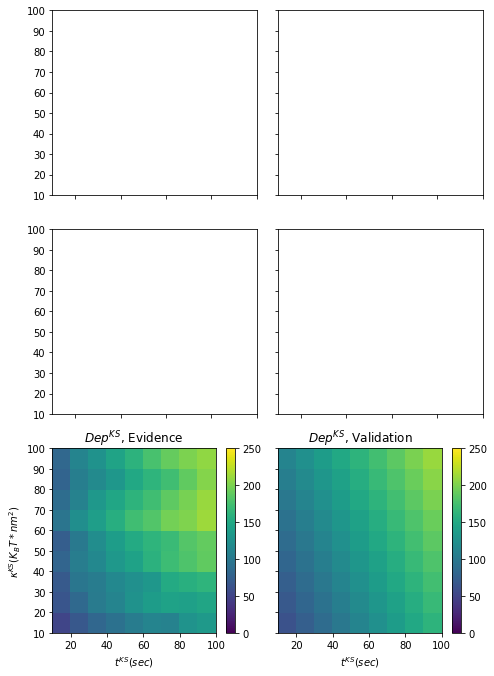

In [ ]:
### plot #######################################################################
fig, ax0 = plt.subplots(3,2, figsize=[7, 9.5], sharex=True, sharey=True)

if use_wTCR:
    vmin11 = 0; vmax11 = 500
    im1 = ax0[0,0].pcolor(t, k, wTCR_array, vmin=vmin11, vmax=vmax11)
    # ax0[0,0].contour(t, k, wTCR_array, vmin=vmin11, vmax=vmax11, colors='w')
    fig.colorbar(im1, ax=ax0[0,0]) 
    ax0[0,0].set_title('$w_{TCR}^{KS}$, Evidence)')
    ax0[0,0].set_xlabel('$t^{KS}(sec)$')
    ax0[0,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')

    im4 = ax0[0,1].pcolor(t, k, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11)
    # ax0[0,1].contour(t, k, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11, colors='w')
    fig.colorbar(im4, ax=ax0[0,1])
    ax0[0,1].set_title('$w_{TCR}^{KS}$,Validation')
    ax0[0,1].set_xlabel('$t^{KS}(sec)$')
    ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
if use_wCD45:
    vmin22 = 0; vmax22 = 500
    im2 = ax0[1,0].pcolor(t, k, wCD45_array, vmin=vmin22, vmax=vmax22)
    # ax0[1,0].contour(t, k, wCD45_array, vmin=vmin22, vmax=vmax22, colors='w')
    fig.colorbar(im1, ax=ax0[1,0])
    ax0[1,0].set_title('$w_{CD45}^{KS}$, Evidence')
    ax0[1,0].set_xlabel('$t^{KS}(sec)$')
    ax0[1,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


    im5 = ax0[1,1].pcolor(t, k, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22)
    # ax0[1,1].contour(t, k, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22, colors='w')
    fig.colorbar(im5, ax=ax0[1,1])
    ax0[1,1].set_title('$w_{CD45}^{KS}$, Validation')
    ax0[1,1].set_xlabel('$t^{KS}(sec)$')
    ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
vmin12 = 0; vmax12 = 250
im3 = ax0[2,0].pcolor(t, k, dep_array, vmin=vmin12, vmax=vmax12)
# ax0[2,0].contour(t, k, dep_array, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im3, ax=ax0[2,0]) # cbarlabel="nm]"
ax0[2,0].set_title('$Dep^{KS}$, Evidence')
ax0[2,0].set_xlabel('$t^{KS}(sec)$')
ax0[2,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im6 = ax0[2,1].pcolor(t, k, dep_KS1_validation, vmin=vmin12, vmax=vmax12)
# ax0[2,1].contour(t, k, dep_KS1_validation, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax0[2,1])
ax0[2,1].set_title('$Dep^{KS}$, Validation')
ax0[2,1].set_xlabel('$t^{KS}(sec)$')
# ax0[2,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

plt.tight_layout();                            


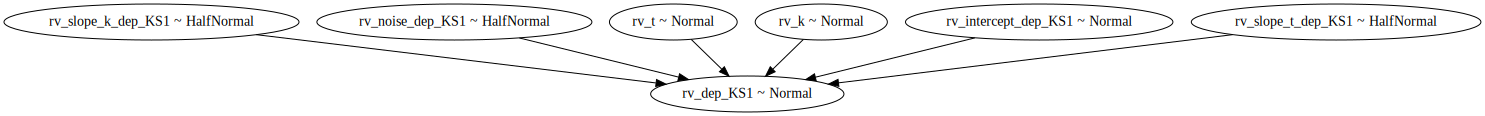

In [ ]:
def get_model1_trained(trace1, observed_t= None, observed_k= None):
    ''' return model1 trained based on trace1. 
    If observed_t and/or observed_k are specified, 
    return the model conditioned on those values '''
    model1_trained = pm.Model()
    with model1_trained:
        ### model1 - KS (kinetic segregation) ###########################    
        #  #####################################################
        
        rv_t = pm.Normal('rv_t', mu=70, sd=30, observed= observed_t)
        rv_k = pm.Normal('rv_k', mu=50, sd=20, observed= observed_k)

        # dw_TCR_KS ####################################################
        if use_wTCR:
            # surface t slope:
            rv_slope_t_wTCR_KS1 = pm.HalfNormal('rv_slope_t_wTCR_KS1', 
                    sd = trace1_summary_r.loc['rv_slope_t_wTCR_KS1','mean']) 

            # surface k slope:
            rv_slope_k_wTCR_KS1 = pm.HalfNormal('rv_slope_k_wTCR_KS1', 
                    sd = trace1_summary_r.loc['rv_slope_k_wTCR_KS1','mean']) 
            
            # surface intercept:
            rv_intercept_wTCR_KS1 = pm.Normal('rv_intercept_wTCR_KS1', 
                    mu = trace1_summary_r.loc['rv_intercept_wTCR_KS1','mean'],
                    sd = trace1_summary_r.loc['rv_intercept_wTCR_KS1','sd']) 

            # noise:
            rv_noise_wTCR_KS1 = pm.HalfNormal('rv_noise_wTCR_KS1', 
                    sd = trace1_summary_r.loc['rv_noise_wTCR_KS1','mean'])  
            
            # wTCR:
            rv_wTCR_KS1 = pm.Normal('rv_wTCR_KS1', mu = rv_intercept_wTCR_KS1 +\
                                    rv_slope_t_wTCR_KS1*rv_t +\
                                    rv_slope_k_wTCR_KS1*rv_k,
                                    sd = rv_noise_wTCR_KS1) #   

        # w_CD45_KS ####################################################
        if use_wCD45:
            # surface t slope:
            rv_slope_t_wCD45_KS1 = pm.HalfNormal('rv_slope_t_wCD45_KS1',
                    sd = trace1_summary_r.loc['rv_slope_t_wCD45_KS1','mean']) 

            # surface k slope:
            rv_slope_k_wCD45_KS1 = pm.HalfNormal('rv_slope_k_wCD45_KS1', 
                    sd = trace1_summary_r.loc['rv_slope_k_wCD45_KS1','mean']) 

            # surface intercept:
            rv_intercept_wCD45_KS1 = pm.Normal('rv_intercept_wCD45_KS1', 
                    mu = trace1_summary_r.loc['rv_intercept_wCD45_KS1','mean'], 
                    sd = trace1_summary_r.loc['rv_intercept_wCD45_KS1','sd']) 

            # noise:
            rv_noise_wCD45_KS1 = pm.HalfNormal('rv_noise_wCD45_KS1', 
                    sd = trace1_summary_r.loc['rv_noise_wCD45_KS1','mean']) 

            # wCD45:
            rv_wCD45_KS = pm.Normal('rv_wCD45_KS',
                                    mu = rv_intercept_wCD45_KS1 +\
                                    rv_slope_t_wCD45_KS1*rv_t +\
                                    rv_slope_k_wCD45_KS1*rv_k,
                                    sd = rv_noise_wCD45_KS1) #

        # dep_KS #####################################################
        if use_sigmoid:
            # sigmoid center t:
            rv_center_t_dep_KS1 = pm.Normal('rv_center_t_dep_KS1',
                mu = trace1_summary_r.loc['rv_center_t_dep_KS1','mean'], 
                sd = trace1_summary_r.loc['rv_center_t_dep_KS1','sd'])
            
            # sigmoid devisor t:
            rv_divisor_t_dep_KS1 = pm.TruncatedNormal('rv_divisor_t_dep_KS1',
                            mu = trace1_summary_r.loc['rv_divisor_t_dep_KS1','mean'],
                            sd = trace1_summary_r.loc['rv_divisor_t_dep_KS1','sd'],
                            lower = lower_rv_divisor_t_dep_KS1,
                            upper = upper_rv_divisor_t_dep_KS1)
            
            # sigmoid center t:
            rv_center_k_dep_KS1 = pm.Normal('rv_center_k_dep_KS1',
                mu = trace1_summary_r.loc['rv_center_k_dep_KS1','mean'], 
                sd = trace1_summary_r.loc['rv_center_k_dep_KS1','sd'])
            
            # sigmoid devisor t:
            rv_divisor_k_dep_KS1 = pm.TruncatedNormal('rv_divisor_k_dep_KS1',
                            mu = trace1_summary_r.loc['rv_divisor_k_dep_KS1','mean'], 
                            sd = trace1_summary_r.loc['rv_divisor_k_dep_KS1','mean'],
                            lower = lower_rv_divisor_k_dep_KS1,
                            upper = upper_rv_divisor_k_dep_KS1)

            # sigmoid min:        
            rv_min_dep_KS1 = pm.TruncatedNormal('rv_min_dep_KS1',
                    mu = trace1_summary_r.loc['rv_min_dep_KS1','mean'],
                    sd = trace1_summary_r.loc['rv_min_dep_KS1','sd'],
                    lower = lower_rv_min_dep_KS1,
                    upper = upper_rv_min_dep_KS1)
            
            # sigmoid max:
            rv_max_dep_KS1 = pm.TruncatedNormal('rv_max_dep_KS1',
                    mu = trace1_summary_r.loc['rv_max_dep_KS1','mean'],
                    sd = trace1_summary_r.loc['rv_max_dep_KS1','mean'],
                    lower = lower_rv_max_dep_KS1,
                    upper = upper_rv_max_dep_KS1)

            # sigmoids ratio:
            rv_sigRatio_dep_KS1 = pm.Normal('rv_sigRatio_dep_KS1',
                mu = trace1_summary_r.loc['rv_sigRatio_dep_KS1','mean'],
                sd = trace1_summary_r.loc['rv_sigRatio_dep_KS1','sd'])

            # noise: 
            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1',
                sd = trace1_summary_r.loc['rv_noise_dep_KS1','mean'])

            rv_tmp_x2 = (rv_t - rv_center_t_dep_KS1) / rv_divisor_t_dep_KS1

            rv_tmp_sig2 = 1.0 / (1 + np.exp(-rv_tmp_x2))

            rv_tmp_x1 = (rv_k - rv_center_k_dep_KS1) / rv_divisor_k_dep_KS1

            rv_tmp_sig1 = 1.0 / (1 + np.exp(-rv_tmp_x1))
            
            
            rv_dep_KS = pm.Normal('rv_dep_KS', mu = rv_min_dep_KS1 +\
                                    (rv_max_dep_KS1 - rv_min_dep_KS1)*\
                                    rv_tmp_sig1 + rv_sigRatio_dep_KS1*rv_tmp_sig2,
                                    sd = rv_noise_dep_KS1)
                   
        else:
            # rv_***_t_dep_KS1
            rv_slope_t_dep_KS1 = pm.HalfNormal('rv_slope_t_dep_KS1', 
                     sd = trace1_summary_r.loc['rv_slope_t_dep_KS1','mean']) # surface t slope
            # rv_***_k_dep_KS1
            rv_slope_k_dep_KS1 = pm.HalfNormal('rv_slope_k_dep_KS1', 
                     sd = trace1_summary_r.loc['rv_slope_k_dep_KS1','mean']) # surface k slope
            # rv_***_dep_KS1
            rv_intercept_dep_KS1 = pm.Normal('rv_intercept_dep_KS1', 
                   mu = trace1_summary_r.loc['rv_intercept_dep_KS1','mean'], 
                   sd = trace1_summary_r.loc['rv_intercept_dep_KS1','sd']) # surface intercept

            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1', 
                                                sd = sd_rv_noise_dep_KS1) # noise 
            # rv_wCD45_KS1, equation:
            rv_dep_KS1 = pm.Normal('rv_dep_KS1', mu = rv_intercept_dep_KS1 +\
                                    rv_slope_t_dep_KS1*rv_t +\
                                    rv_slope_k_dep_KS1*rv_k,
                                    sd = rv_noise_dep_KS1) #


    return model1_trained

model1_trained= get_model1_trained(trace1)
gv1 = pm.model_to_graphviz(model1_trained)
display(gv1)

In [ ]:
n_t = 20 #11
n_k = 20 #11
Ts = np.linspace(100/n_t,100, n_t)
Ks = np.linspace(100/n_k,100, n_k)

if use_wTCR:
    wTCRs_mean = np.zeros((n_k, n_t))
    wTCRs_std = np.zeros((n_k, n_t))

if use_wCD45:
    wCD45s_mean = np.zeros((n_k, n_t))
    wCD45s_std = np.zeros((n_k, n_t))

deps_mean = np.zeros((n_k, n_t))
deps_std = np.zeros((n_k, n_t))


for i,k in enumerate(Ks):
    for j,t in enumerate(Ts):
        cur_model= get_model1_trained(trace1, observed_k= k, observed_t= t)
        with cur_model:
            cur_trace = pm.sample(2000, chains=4, progressbar = False);
        print(f"i,t={i,t}, j,k={j,k}")
        if use_wTCR:
            wTCRs_mean[i,j] = cur_trace.rv_wTCR_KS.mean() 
            wTCRs_std[i,j] = cur_trace.rv_wTCR_KS.std();

        if use_wCD45:
            wCD45s_mean[i,j] = cur_trace.rv_wCD45_KS.mean() 
            wCD45s_std[i,j] = cur_trace.rv_wCD45_KS.std();
   
        deps_mean[i,j] = cur_trace.rv_dep_KS1.mean() 
        deps_std[i,j] = cur_trace.rv_dep_KS1.std();

In [ ]:
if use_wTCR:
    np.save("trained_wTCR_KS_mean_10x10_20004", wTCRs_mean)
    np.save("trained_wTCR_KS_std_10x10_20004", wTCRs_std)

if use_wCD45:
    np.save("trained_wCD45_KS_mean_10x10_20004", wCD45s_mean)
    np.save("trained_wCD45_KS_std_10x10_20004", wCD45s_std)

np.save("trained_dep_KS_mean_10x10_20004", deps_mean)
np.save("trained_dep_KS_std_10x10_20004", deps_std)
!ls

sample_data	trained_dep_KS_mean_10x10_20004.npy
trace1_summary	trained_dep_KS_std_10x10_20004.npy


In [ ]:
if True:
    from google.colab import files
    if use_wTCR:
        files.download("trained_wTCR_KS_mean_10x10_20004.npy") # Download locally from colab
        files.download("trained_wTCR_KS_std_10x10_20004.npy")

    if use_wCD45:
        files.download("trained_wCD45_KS_mean_10x10_20004.npy") 
        files.download("trained_wCD45_KS_std_10x10_20004.npy")

    files.download("trained_dep_KS_mean_10x10_20004.npy") 
    files.download("trained_dep_KS_std_10x10_20004.npy") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


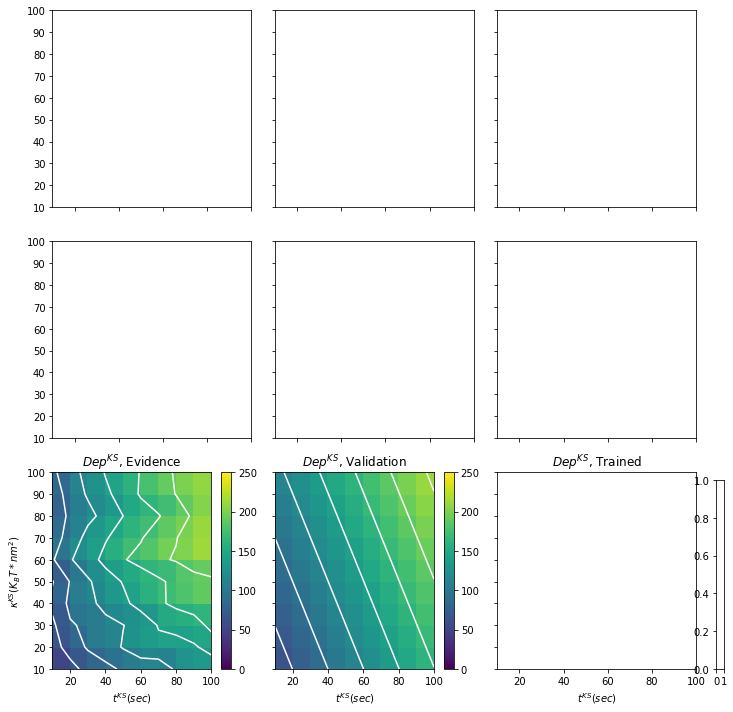

In [ ]:
# trainedw_TCR_KS_mean = np.load('trained_w_TCR_KS_mean_10x10.npy')
# trainedw_CD45_KS_mean = np.load('trained_w_CD45_KS_mean_10x10.npy')
# traineddep_KS_mean = np.load('trained_dep_KS_mean_10x10.npy')

fig, ax0 = plt.subplots(3,3, figsize=[10, 10], sharex=True, sharey=True)
"""
fig = plt.figure()
# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
plt.plot([1, 2, 3], [1, 2, 3])
# Adds a subplot at the 4th position
fig.add_subplot(2, 2, 4)
plt.plot([3, 2, 1], [1, 2, 3])
"""
if use_wTCR:
    vmin11 = 0; vmax11 = 500
    im0 = ax0[0,0].pcolor(t, k, wTCR_array, vmin=vmin11, vmax=vmax11)
    ax0[0,0].contour(t, k, wTCR_array, vmin=vmin11, vmax=vmax11, colors='w')
    fig.colorbar(im1, ax=ax0[0,0])
    ax0[0,0].set_title("$w_{TCR}^{KS}$, Evidence)")
    ax0[0,0].set_xlabel('$t^{KS}(sec)$')
    ax0[0,0].set_ylabel("$\kappa^{KS}(K_BT/nm)$")

    im2 = ax0[0,1].pcolor(t, k, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11)
    ax0[0,1].contour(t_array, k_array, wTCR_KS1_validation, vmin=vmin11, vmax=vmax11, colors='w')
    fig.colorbar(im2, ax=ax0[0,1])
    ax0[0,1].set_title("$w_{TCR}^{KS}$, Validation")
    ax0[0,1].set_xlabel('$t^{KS}(sec)$')
    ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

    # im3 = ax0[0,2].pcolor(Ts, Ks, w_TCRs_mean, vmin=vmin11, vmax=vmax11)
    # ax1[2,0].contour(Ts, Ks, w_TCR_KS_mean, vmin=vmin11, vmax=vmax11, colors='w')
    # fig.colorbar(im3, ax=ax0[0,2])
    # ax0[0,2].set_title("$w_{TCR}^{KS}$, TRained")
    # ax1[0,2].set_xlabel("$t^{KS}(sec)$")
    # ax1[0,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

    # cbar_location="right"
    # cbar_mode="single"
    # cbar_size="7%"
    # cbar_pad=0.15
    # Colorbar
    cbar_ax = fig.add_axes([1, 0.695, 0.01, 0.262])
    fig.colorbar(im3, cax=cbar_ax)
##########################################################
if use_wCD45:
    vmin22 = 0; vmax22 = 500
    im4 = ax0[1,0].pcolor(t, k, wCD45_array, vmin=vmin22, vmax=vmax22)
    ax0[1,0].contour(t, k, wCD45_array, vmin=vmin22, vmax=vmax22, colors='w')
    fig.colorbar(im1, ax=ax0[1,0])
    ax0[1,0].set_title("$w_{CD45}^{KS}$, Evidence")
    ax0[1,0].set_xlabel('$t^{KS}(sec)$')
    ax0[1,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")


    im5 = ax0[1,1].pcolor(t, k, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22)
    ax0[1,1].contour(t, k, wCD45_KS1_validation, vmin=vmin22, vmax=vmax22, colors='w')
    fig.colorbar(im4, ax=ax0[1,1])
    ax0[1,1].set_title("$w_{CD45}^{KS}$, Validation")
    ax0[1,1].set_xlabel('$t^{KS}(sec)$')
    ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

    # im6 = ax0[1,2].pcolor(Ts, Ks, w_CD45s_mean, vmin=vmin22, vmax=vmax22)
    # ax0[2,1].contour(Ts, Ks, w_CD45_KS_mean, vmin=vmin22, vmax=vmax22, colors='w')
    # fig.colorbar(im6, ax=ax0[1,2])
    # ax0[1,2].set_title("$w_{CD45}^{KS}$, Trained")
    # ax0[1,2].set_xlabel("$t^{KS}(sec)$")
    # ax0[1,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

    cbar_ax = fig.add_axes([1, 0.38, 0.01, 0.262])
    fig.colorbar(im6, cax=cbar_ax)
##########################################################
vmin12 = 0; vmax12 = 250
im7 = ax0[2,0].pcolor(t, k, dep_array, vmin=vmin12, vmax=vmax12)
ax0[2,0].contour(t, k, dep_array, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im3, ax=ax0[2,0]) # cbarlabel="nm]"
ax0[2,0].set_title('$Dep^{KS}$, Evidence')
ax0[2,0].set_xlabel('$t^{KS}(sec)$')
ax0[2,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im7 = ax0[2,1].pcolor(t, k, dep_KS1_validation, vmin=vmin12, vmax=vmax12)
ax0[2,1].contour(t, k, dep_KS1_validation, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax0[2,1])
ax0[2,1].set_title("$Dep^{KS}$, Validation")
ax0[2,1].set_xlabel("$t^{KS}(sec)$")
# ax0[2,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

# im9 = ax0[2,2].pcolor(Ts, Ks, deps_mean, vmin=vmin12, vmax=vmax12)
# ax0[2,2].contour(Ts, Ks, dep_KS_mean, vmin=vmin12, vmax=vmax12, colors='w')
# fig.colorbar(im9, ax=ax0[2,2])
ax0[2,2].set_title("$Dep^{KS}$, Trained")
ax0[2,2].set_xlabel("$t^{KS}(sec)$")
# ax0[2,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

cbar_ax = fig.add_axes([1, 0.065, 0.01, 0.262])
# fig.colorbar(im9, cax=cbar_ax)

plt.tight_layout();                  
